In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("diabetic_data.csv")

In [3]:
df


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [6]:
df['readmitted_binary'] =df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

In [7]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,>30,0
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,NO,0
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,NO,0
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,Up,No,No,No,No,No,Ch,Yes,NO,0


In [8]:
df.replace('?', np.nan, inplace=True)
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,>30,0
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,NO,0
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,NO,0
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,Up,No,No,No,No,No,Ch,Yes,NO,0


In [9]:
##Dropping the columns with more than 40% missing values
missing_threshold = 0.4
missing_percent = df.isnull().mean()
cols_to_drop = missing_percent[missing_percent > missing_threshold].index.tolist()
df.drop(columns=cols_to_drop, inplace=True)

In [10]:
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,MC,...,Down,No,No,No,No,No,Ch,Yes,>30,0
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,MC,...,Steady,No,No,No,No,No,No,Yes,NO,0
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,MC,...,Down,No,No,No,No,No,Ch,Yes,NO,0
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,MC,...,Up,No,No,No,No,No,Ch,Yes,NO,0


In [11]:
##Drop unnecessary identifier columns and the original target column
df.drop(['encounter_id', 'patient_nbr', 'readmitted'], axis=1, inplace=True)

In [12]:
 ##Separate categorical and numerical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [13]:
cat_cols

['race',
 'gender',
 'age',
 'payer_code',
 'diag_1',
 'diag_2',
 'diag_3',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

In [14]:
num_cols

['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'readmitted_binary']

In [15]:
##Unique values in categorical columns
print("Unique values in categorical columns:")
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

##Unique values in numerical columns
print(" \ Unique values in numerical columns:")
for col in num_cols:
    print(f"{col}: {df[col].unique()}")

Unique values in categorical columns:
race: ['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
gender: ['Female' 'Male' 'Unknown/Invalid']
age: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
payer_code: [nan 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
diag_1: ['250.83' '276' '648' '8' '197' '414' '428' '398' '434' '250.7' '157'
 '518' '999' '410' '682' '402' '737' '572' 'V57' '189' '786' '427' '996'
 '277' '584' '462' '473' '411' '174' '486' '998' '511' '432' '626' '295'
 '196' '250.6' '618' '182' '845' '423' '808' '250.4' '722' '403' '250.11'
 '784' '707' '440' '151' '715' '997' '198' '564' '812' '38' '590' '556'
 '578' '250.32' '433' 'V58' '569' '185' '536' '255' '250.13' '599' '558'
 '574' '491' '560' '244' '250.03' '577' '730' '188' '824' '250.8' '332'
 '562' '291' '296' '510' '401' '263' '438' '70' '250.02' '493' '642' '625'
 '571' '738' '593' '250.42' '807' '456' '446' '

In [16]:
##Diagnosis columns
diag_cols = ['diag_1', 'diag_2', 'diag_3']

# Function to check if a value is a number
def is_number(val):
    try:
        float(val)
        return True
    except:
        return False

# Keep only rows where all diagnosis columns are numeric
for col in diag_cols:
    df = df[df[col].apply(is_number)]  # keep only if value is numeric
    df = df[df[col].notna()]           # also drop NaNs

# Optionally, convert them to float for future use
df[diag_cols] = df[diag_cols].astype(float)

print("Data shape after removing non-numeric diagnoses:", df.shape)

Data shape after removing non-numeric diagnoses: (91844, 44)


In [17]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_binary
1,Caucasian,Female,[10-20),1,1,7,3,NaN,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,0
3,Caucasian,Male,[30-40),1,1,7,2,NaN,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,[40-50),1,1,7,1,NaN,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,0
5,Caucasian,Male,[50-60),2,1,2,3,NaN,31,6,...,No,Steady,No,No,No,No,No,No,Yes,0
7,Caucasian,Male,[70-80),1,1,7,5,NaN,73,0,...,No,No,No,No,No,No,No,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,MC,51,0,...,No,Down,No,No,No,No,No,Ch,Yes,0
101762,AfricanAmerican,Female,[80-90),1,4,5,5,MC,33,3,...,No,Steady,No,No,No,No,No,No,Yes,0
101763,Caucasian,Male,[70-80),1,1,7,1,MC,53,0,...,No,Down,No,No,No,No,No,Ch,Yes,0
101764,Caucasian,Female,[80-90),2,3,7,10,MC,45,2,...,No,Up,No,No,No,No,No,Ch,Yes,0


In [18]:
df['payer_code'].value_counts()

payer_code
MC    29596
HM     5703
SP     4475
BC     4182
MD     3194
CP     2271
UN     2171
CM     1759
OG      933
PO      522
DM      489
CH      132
WC      104
OT       89
MP       62
SI       45
FR        1
Name: count, dtype: int64

In [19]:
##Check null values in those columns
print("🔍 Null values in categorical columns:")
print(df[cat_cols].isnull().sum())

🔍 Null values in categorical columns:
race                         2062
gender                          0
age                             0
payer_code                  36116
diag_1                          0
diag_2                          0
diag_3                          0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
examide                         0
citoglipton                     0
insulin                         0
glyburide-metformin             0
glipizide-metformin             0
glimepiride-pioglitazone        0
metformin-

In [20]:
df.drop('payer_code', axis=1, inplace=True)  #dropping the payer_code column as it is 51% records missing
df['race'].fillna(df['race'].mode()[0], inplace=True)   #filling the null values with most common values

C:\Users\Shubhasree Mahapatra\AppData\Local\Temp\ipykernel_3176\1733553277.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].fillna(df['race'].mode()[0], inplace=True)   #filling the null values with most common values


In [21]:
##dropping unnecessary medication columns
all_med_cols = [ 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
    'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-rosiglitazone', 'metformin-pioglitazone']           
keep_meds = ['insulin', 'metformin', 'glipizide']       #medications to keep
drop_meds = [col for col in all_med_cols if col not in keep_meds] #columns to drop
df.drop(columns=drop_meds, inplace=True)

print(f" Dropped {len(drop_meds)} medication columns.")
print(" Remaining medication columns:", keep_meds)


 Dropped 20 medication columns.
 Remaining medication columns: ['insulin', 'metformin', 'glipizide']


In [22]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,diag_1,diag_2,diag_3,number_diagnoses,metformin,glipizide,insulin,change,diabetesMed,readmitted_binary
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,276.00,250.01,255.0,9,No,No,Up,Ch,Yes,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,8.00,250.43,403.0,7,No,No,Up,Ch,Yes,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,197.00,157.00,250.0,5,No,Steady,Steady,Ch,Yes,0
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,...,414.00,411.00,250.0,9,No,No,Steady,No,Yes,0
7,Caucasian,Male,[70-80),1,1,7,5,73,0,12,...,428.00,492.00,250.0,8,No,No,No,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,16,...,250.13,291.00,458.0,9,Steady,No,Down,Ch,Yes,0
101762,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,...,560.00,276.00,787.0,9,No,No,Steady,No,Yes,0
101763,Caucasian,Male,[70-80),1,1,7,1,53,0,9,...,38.00,590.00,296.0,13,Steady,No,Down,Ch,Yes,0
101764,Caucasian,Female,[80-90),2,3,7,10,45,2,21,...,996.00,285.00,998.0,9,No,Steady,Up,Ch,Yes,0


In [23]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'glipizide',
       'insulin', 'change', 'diabetesMed', 'readmitted_binary'],
      dtype='object')

In [24]:
cat_cols1 = df.select_dtypes(include='object').columns.tolist()
num_cols2 = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("catogorical columns", cat_cols1)
print("numerical columns", num_cols2)

catogorical columns ['race', 'gender', 'age', 'metformin', 'glipizide', 'insulin', 'change', 'diabetesMed']
numerical columns ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'readmitted_binary']


##basic data overview after cleaning

In [25]:
### Dataset shape and first few rows
print("Shape:", df.shape)
df.head()

Shape: (91844, 23)


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,diag_1,diag_2,diag_3,number_diagnoses,metformin,glipizide,insulin,change,diabetesMed,readmitted_binary
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,276.0,250.01,255.0,9,No,No,Up,Ch,Yes,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,8.0,250.43,403.0,7,No,No,Up,Ch,Yes,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,197.0,157.00,250.0,5,No,Steady,Steady,Ch,Yes,0
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,...,414.0,411.00,250.0,9,No,No,Steady,No,Yes,0
7,Caucasian,Male,[70-80),1,1,7,5,73,0,12,...,428.0,492.00,250.0,8,No,No,No,No,Yes,0


In [26]:
## Data Types and Non-null Counts

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 91844 entries, 1 to 101765
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      91844 non-null  object 
 1   gender                    91844 non-null  object 
 2   age                       91844 non-null  object 
 3   admission_type_id         91844 non-null  int64  
 4   discharge_disposition_id  91844 non-null  int64  
 5   admission_source_id       91844 non-null  int64  
 6   time_in_hospital          91844 non-null  int64  
 7   num_lab_procedures        91844 non-null  int64  
 8   num_procedures            91844 non-null  int64  
 9   num_medications           91844 non-null  int64  
 10  number_outpatient         91844 non-null  int64  
 11  number_emergency          91844 non-null  int64  
 12  number_inpatient          91844 non-null  int64  
 13  diag_1                    91844 non-null  float64
 14  diag_2    

In [27]:
##summary stat for numerical col
df.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmitted_binary
count,91844.000000,91844.000000,91844.000000,91844.000000,91844.000000,91844.000000,91844.000000,91844.000000,91844.000000,91844.000000,91844.000000,91844.000000,91844.000000,91844.000000,91844.000000
mean,2.006206,3.718969,5.828089,4.426451,43.659390,1.367199,16.234735,0.372730,0.200035,0.629393,489.980119,439.504007,418.606705,7.524161,0.111722
std,1.447620,5.268873,4.059795,2.969502,19.723871,1.730718,8.194439,1.285779,0.942790,1.249767,202.566517,176.658138,177.222366,1.831631,0.315026
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,5.000000,3.000000,3.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,32.000000,0.000000,11.000000,0.000000,0.000000,0.000000,410.000000,278.000000,274.000000,6.000000,0.000000
50%,1.000000,1.000000,7.000000,4.000000,45.000000,1.000000,15.000000,0.000000,0.000000,0.000000,436.000000,427.000000,403.000000,9.000000,0.000000
75%,3.000000,3.000000,7.000000,6.000000,58.000000,2.000000,20.000000,0.000000,0.000000,1.000000,590.000000,530.000000,496.000000,9.000000,0.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,999.000000,999.000000,999.000000,16.000000,1.000000


## Eda on catagorical columns

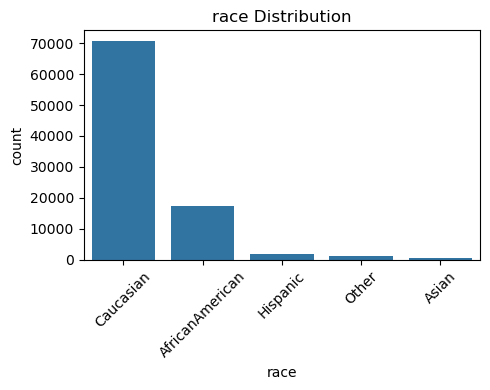

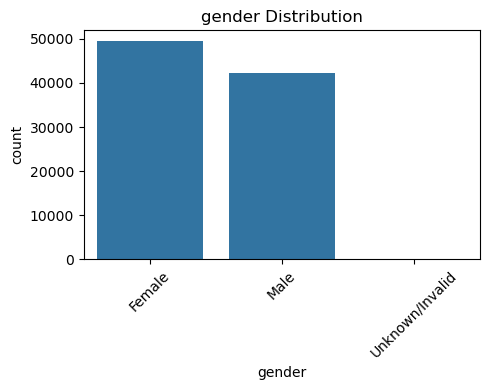

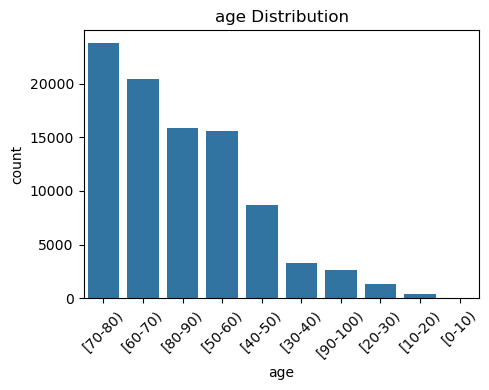

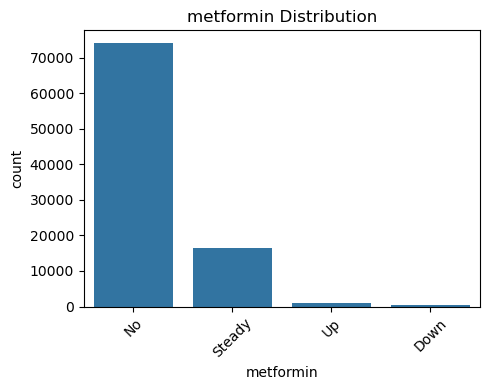

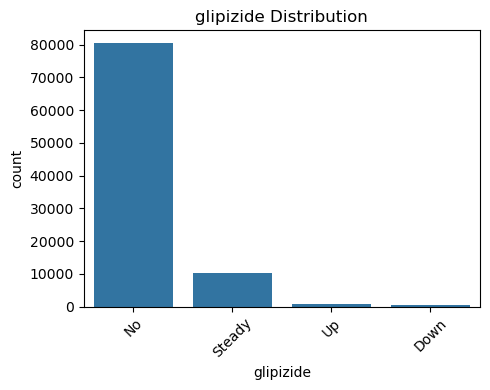

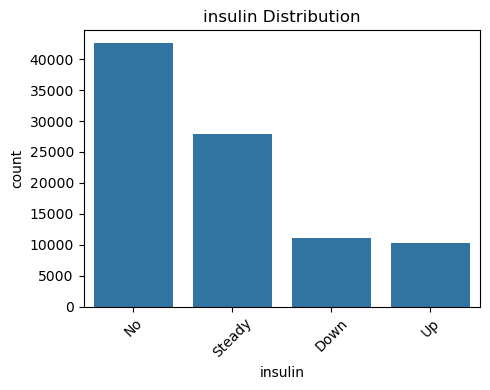

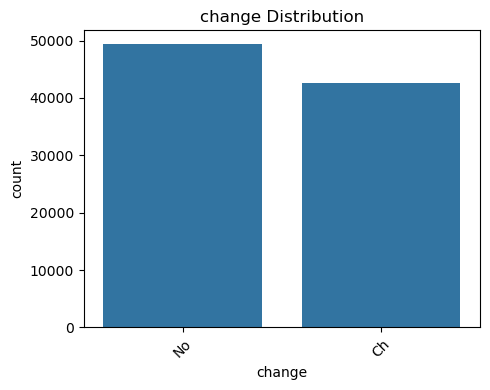

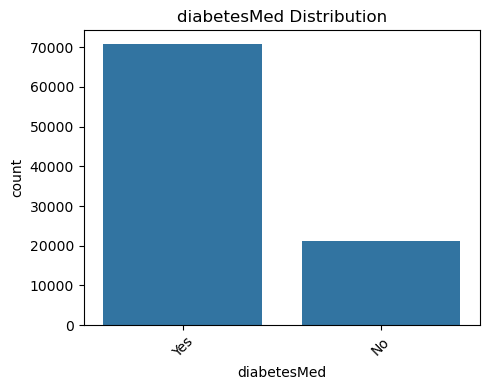

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = ['race', 'gender', 'age', 'metformin', 'glipizide', 'insulin', 'change', 'diabetesMed']

for col in categorical_cols:
    plt.figure(figsize=(5,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Catagorical vs Target(readmission)

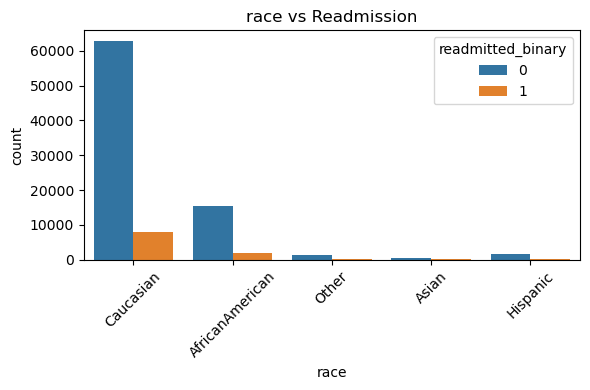

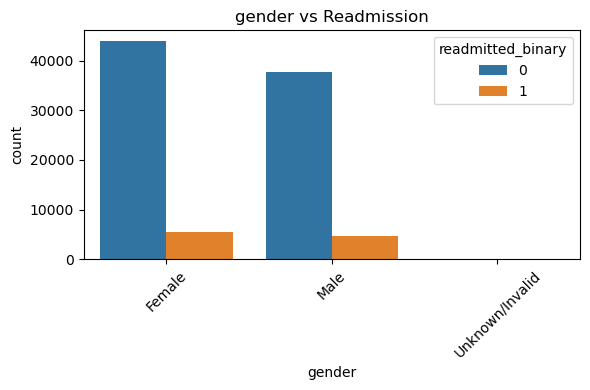

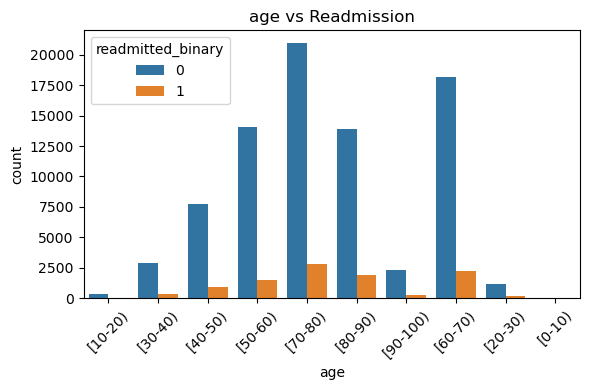

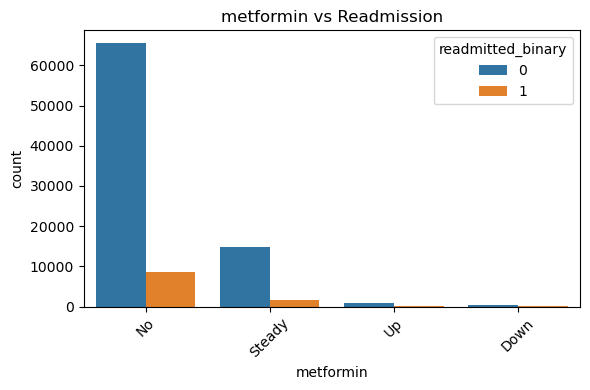

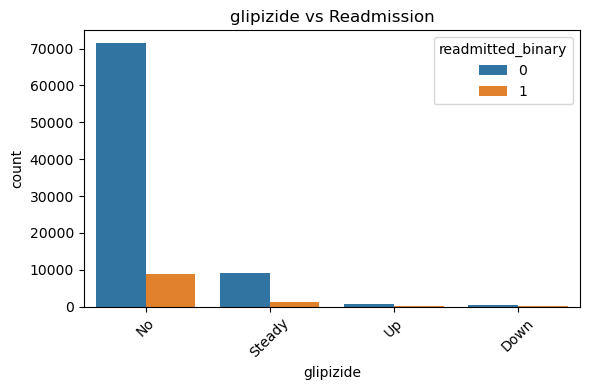

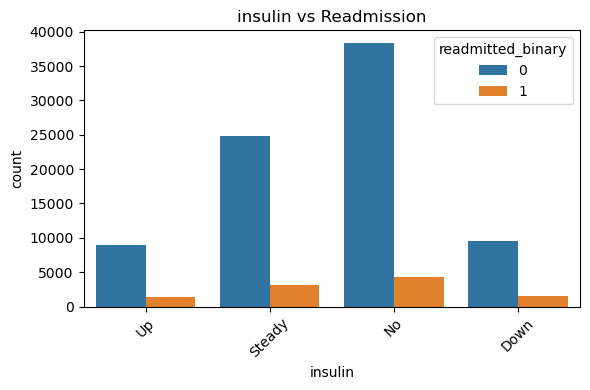

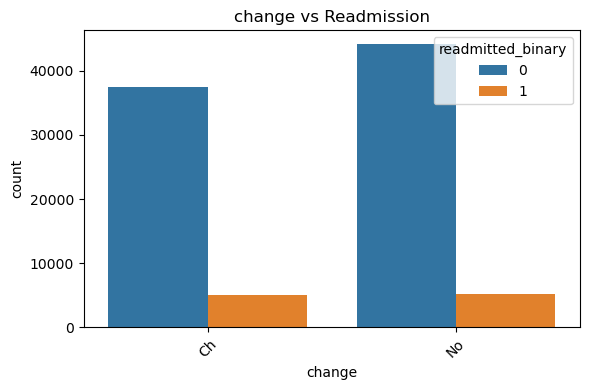

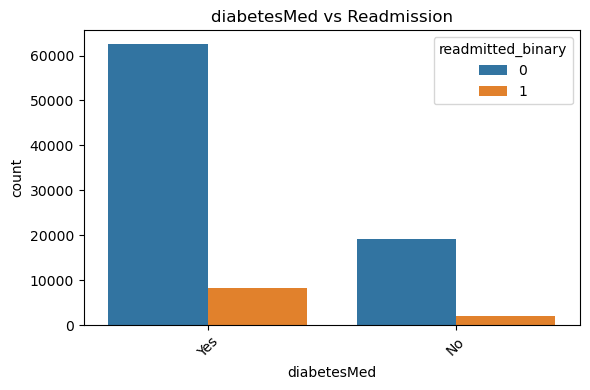

In [29]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='readmitted_binary', data=df)
    plt.title(f"{col} vs Readmission")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## EDA on numerical columns

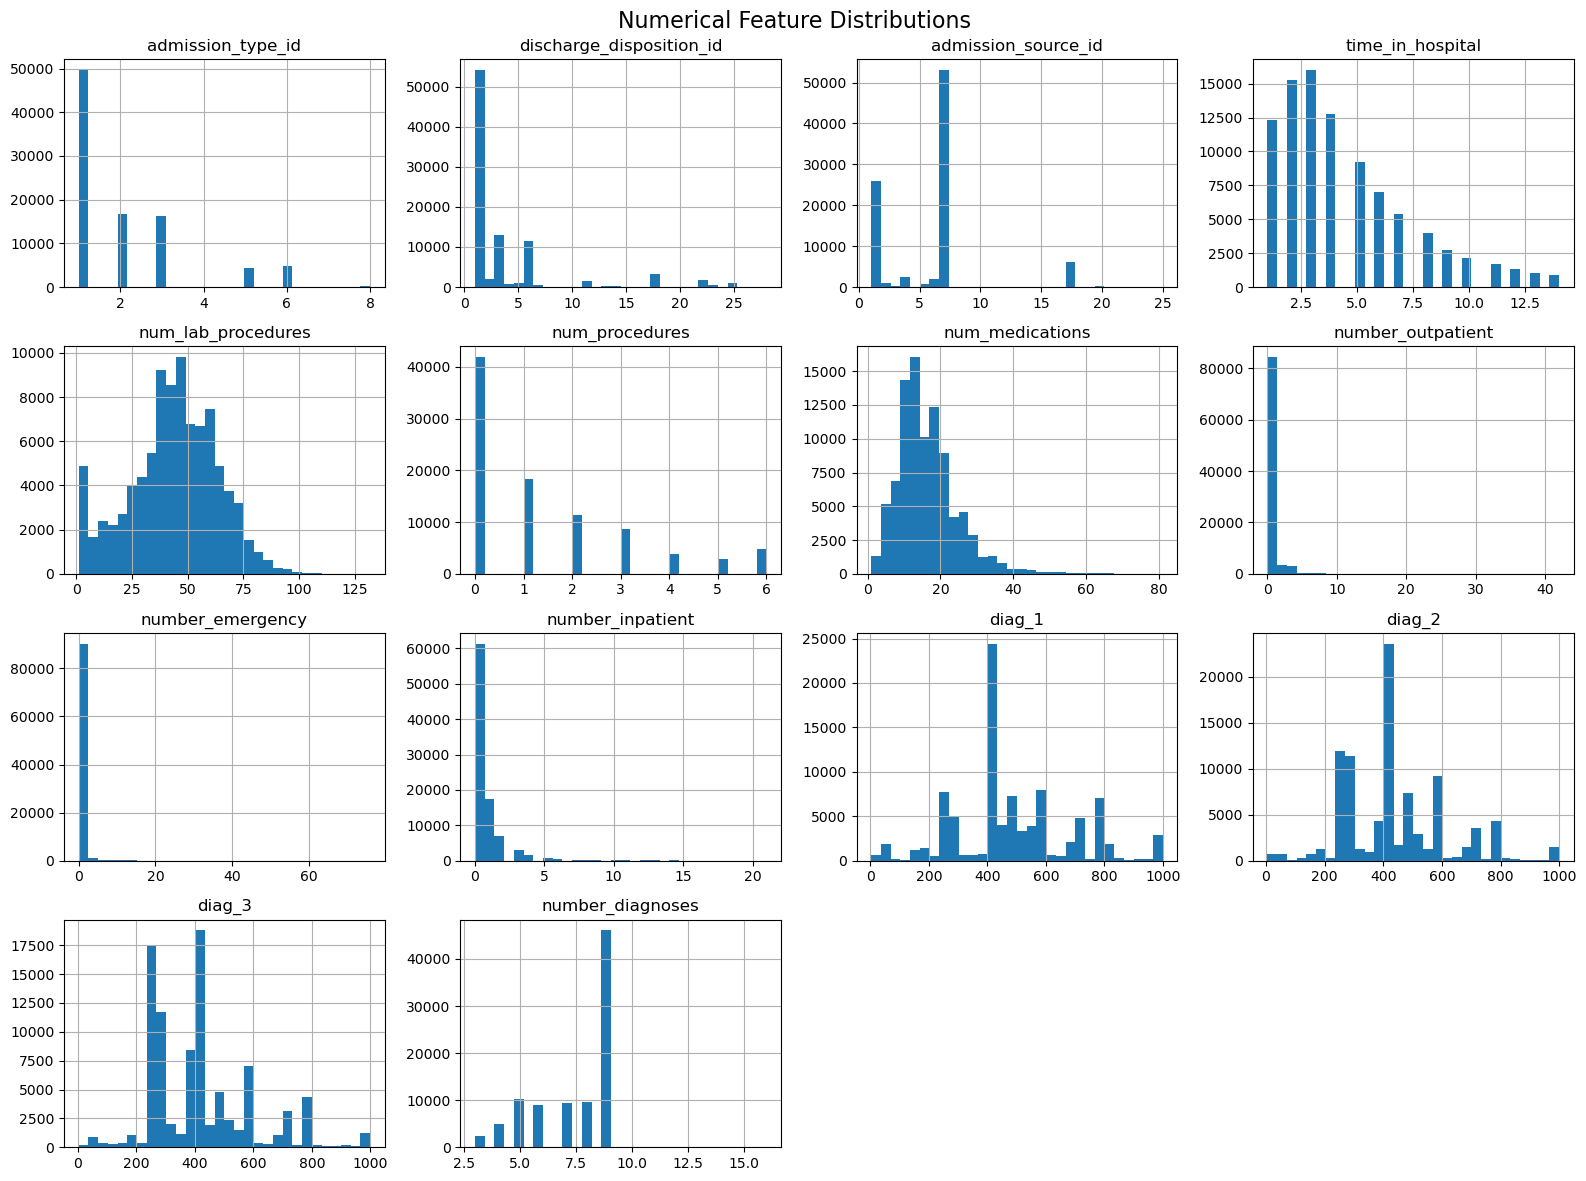

In [30]:
numerical_cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
                  'time_in_hospital', 'num_lab_procedures', 'num_procedures',
                  'num_medications', 'number_outpatient', 'number_emergency',
                  'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses']
df[numerical_cols].hist(figsize=(16, 12), bins=30)
plt.suptitle("Numerical Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


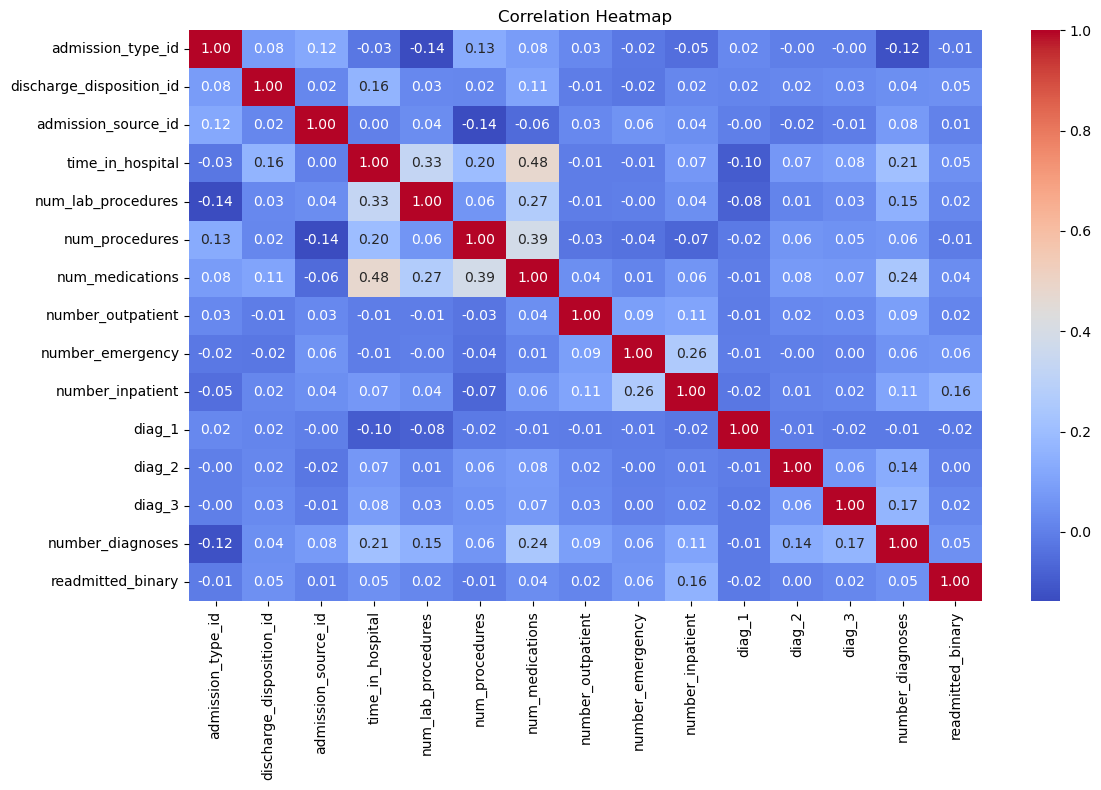

In [31]:
##correlation matrix for numerical catagories

plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols + ['readmitted_binary']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


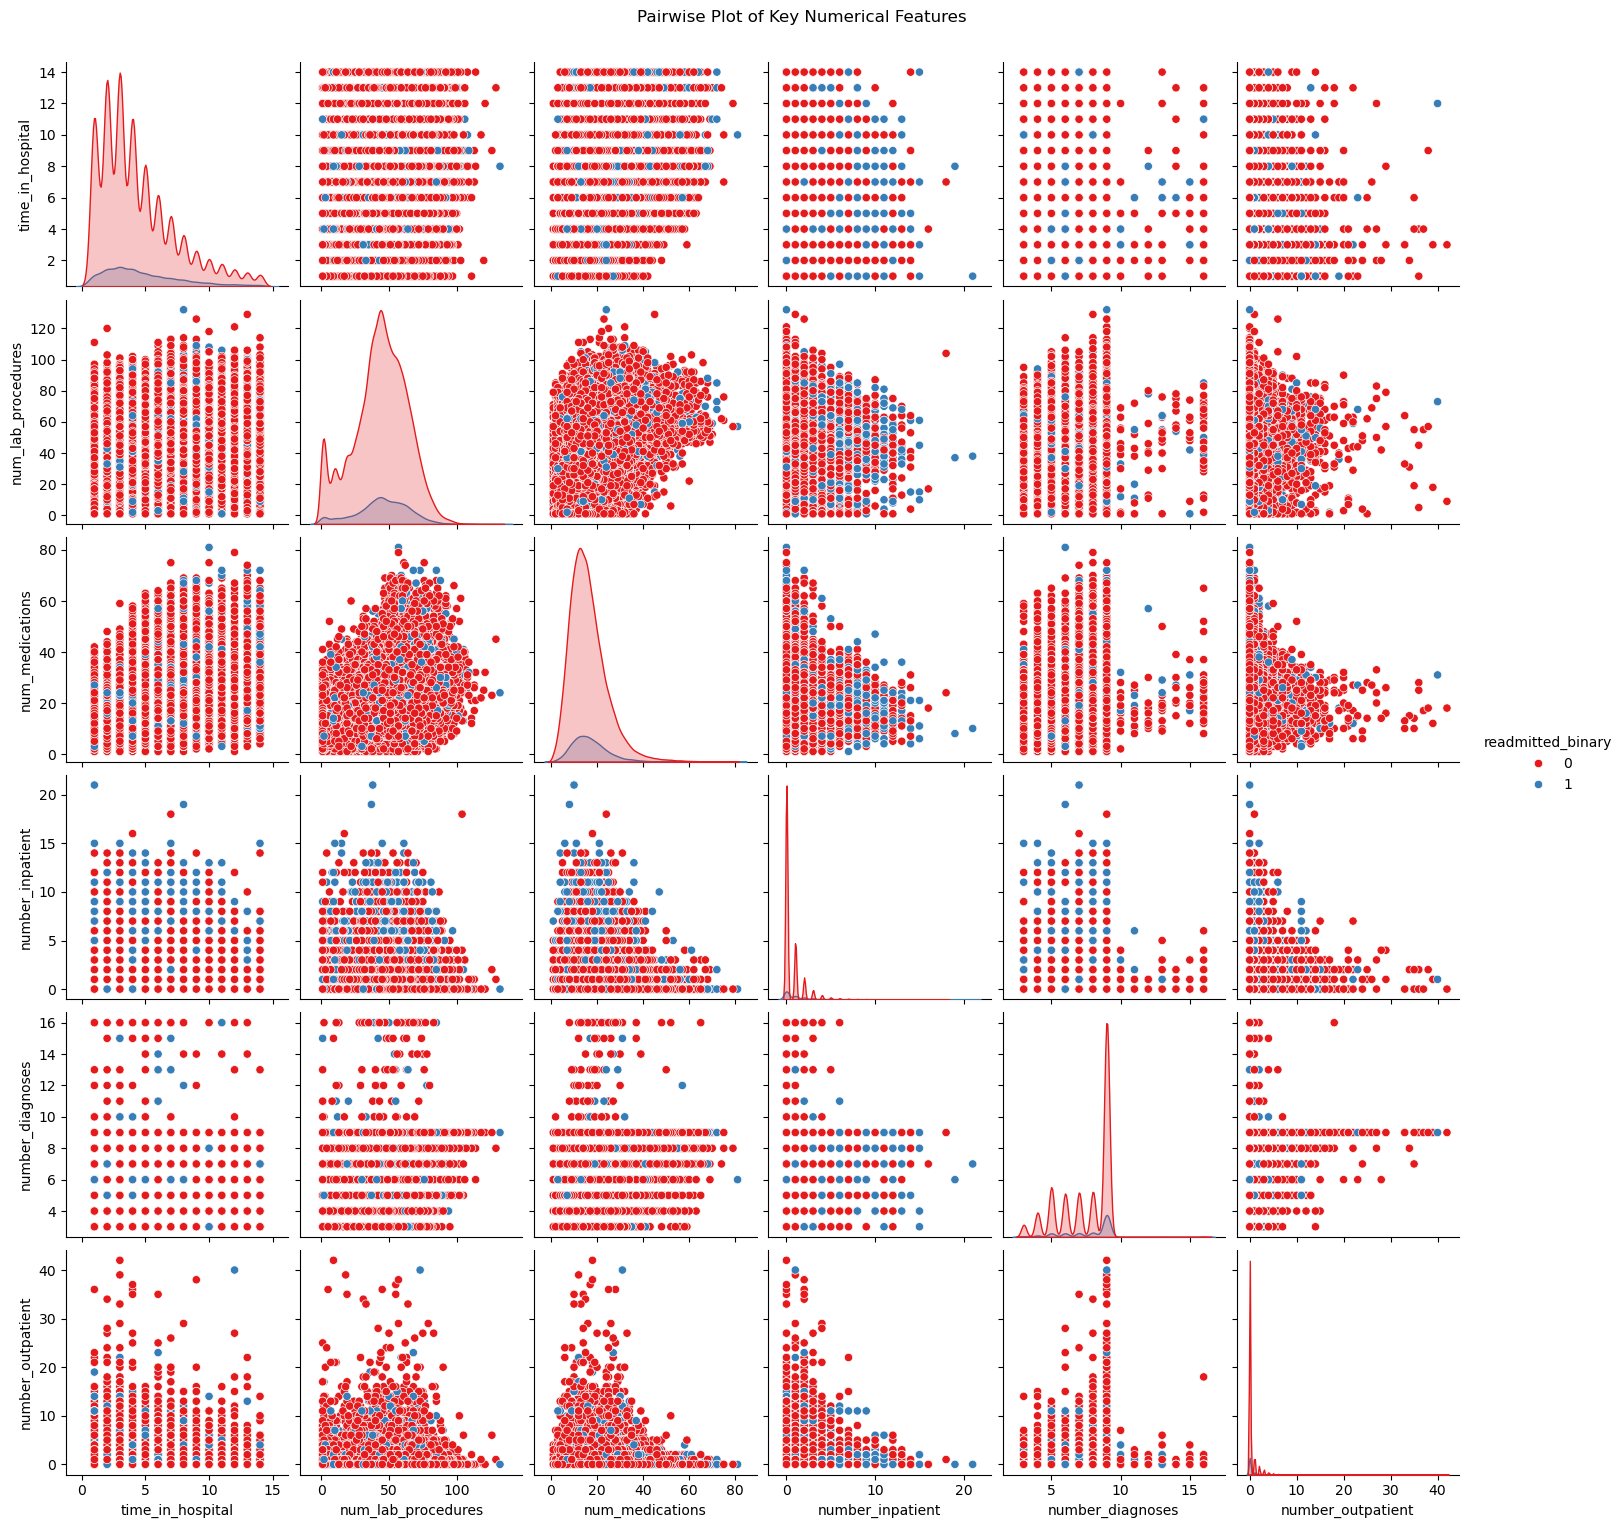

In [32]:
subset_numerical = ['time_in_hospital', 'num_lab_procedures', 'num_medications',
                    'number_inpatient', 'number_diagnoses', 'number_outpatient']

# Plot the pairplot with readmission coloring
sns.pairplot(df[subset_numerical + ['readmitted_binary']], hue='readmitted_binary', palette='Set1')
plt.suptitle("Pairwise Plot of Key Numerical Features", y=1.02)
plt.show()

In [33]:
pip install scikit_learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ['race', 'gender', 'age', 'metformin', 'glipizide', 'insulin', 'change', 'diabetesMed']
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [35]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,diag_1,diag_2,diag_3,number_diagnoses,metformin,glipizide,insulin,change,diabetesMed,readmitted_binary
1,2,0,1,1,1,7,3,59,0,18,...,276.00,250.01,255.0,9,1,1,3,0,1,0
3,2,1,3,1,1,7,2,44,1,16,...,8.00,250.43,403.0,7,1,1,3,0,1,0
4,2,1,4,1,1,7,1,51,0,8,...,197.00,157.00,250.0,5,1,2,2,0,1,0
5,2,1,5,2,1,2,3,31,6,16,...,414.00,411.00,250.0,9,1,1,2,1,1,0
7,2,1,7,1,1,7,5,73,0,12,...,428.00,492.00,250.0,8,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,7,1,3,7,3,51,0,16,...,250.13,291.00,458.0,9,2,1,0,0,1,0
101762,0,0,8,1,4,5,5,33,3,18,...,560.00,276.00,787.0,9,1,1,2,1,1,0
101763,2,1,7,1,1,7,1,53,0,9,...,38.00,590.00,296.0,13,2,1,0,0,1,0
101764,2,0,8,2,3,7,10,45,2,21,...,996.00,285.00,998.0,9,1,2,3,0,1,0


### checking multicollinearity

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import pandas as pd

X = df.drop('readmitted_binary', axis=1)  #dropping the target column before calculating vif


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Sort by highest VIF
vif_data.sort_values(by="VIF", ascending=False, inplace=True)

# Display the result
print("🔍 Variance Inflation Factors:")
print(vif_data)

🔍 Variance Inflation Factors:
                     Feature       VIF
9            num_medications  1.693069
21               diabetesMed  1.479492
20                    change  1.477082
6           time_in_hospital  1.443945
8             num_procedures  1.262112
16          number_diagnoses  1.226142
7         num_lab_procedures  1.192652
17                 metformin  1.140789
3          admission_type_id  1.117081
12          number_inpatient  1.115194
2                        age  1.107440
11          number_emergency  1.093841
19                   insulin  1.086568
5        admission_source_id  1.064966
4   discharge_disposition_id  1.054027
18                 glipizide  1.050793
0                       race  1.044465
15                    diag_3  1.035819
10         number_outpatient  1.030824
14                    diag_2  1.027624
13                    diag_1  1.020532
1                     gender  1.018157


## Feature Selection

In [37]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 5.6 MB/s eta 0:00:27
    --------------------------------------- 2.4/150.0 MB 6.7 MB/s eta 0:00:22
    --------------------------------------- 3.1/150.0 MB 5.6 MB/s eta 0:00:27
    --------------------------------------- 3.4/150.0 MB 4.9 MB/s eta 0:00:30
   - -------------------------------------- 5.0/150.0 MB 5.1 MB/s eta 0:00:29
   - -------------------------------------- 6.6/150.0 MB 5.4 MB/s eta 0:00:27
   -- ------------------------------------- 8.1/150.0 MB 5.8 MB/s eta 0:00:25
   -- ------------------------------------- 9.7/150.0 MB 6.0 MB/s eta 0:00:24
   --- ------------------------------------ 11.3/150.0 MB 6.2 MB/s eta 0:00:23
   --- ------------------------------------ 12.6/150.0 MB 6.3 MB/s eta 0:00:22
   --- ------------------------------------ 14.4/150.0 MB 6.4 MB/s eta 0:00:22
   --- ------------------------------------ 14.9/150.0 MB 6.1 MB/s e


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [39]:
# X = features, y = target
X = df.drop('readmitted_binary', axis=1)
y = df['readmitted_binary']

In [40]:
X

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,glipizide,insulin,change,diabetesMed
1,2,0,1,1,1,7,3,59,0,18,...,0,276.00,250.01,255.0,9,1,1,3,0,1
3,2,1,3,1,1,7,2,44,1,16,...,0,8.00,250.43,403.0,7,1,1,3,0,1
4,2,1,4,1,1,7,1,51,0,8,...,0,197.00,157.00,250.0,5,1,2,2,0,1
5,2,1,5,2,1,2,3,31,6,16,...,0,414.00,411.00,250.0,9,1,1,2,1,1
7,2,1,7,1,1,7,5,73,0,12,...,0,428.00,492.00,250.0,8,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,7,1,3,7,3,51,0,16,...,0,250.13,291.00,458.0,9,2,1,0,0,1
101762,0,0,8,1,4,5,5,33,3,18,...,1,560.00,276.00,787.0,9,1,1,2,1,1
101763,2,1,7,1,1,7,1,53,0,9,...,0,38.00,590.00,296.0,13,2,1,0,0,1
101764,2,0,8,2,3,7,10,45,2,21,...,1,996.00,285.00,998.0,9,1,2,3,0,1


In [41]:
y

1         0
3         0
4         0
5         0
7         0
         ..
101761    0
101762    0
101763    0
101764    0
101765    0
Name: readmitted_binary, Length: 91844, dtype: int64

In [42]:
##Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
X_train

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,glipizide,insulin,change,diabetesMed
30141,2,0,5,1,1,7,4,45,0,21,...,0,404.0,428.0,413.0,9,3,2,2,0,1
7722,2,0,6,5,1,17,2,21,0,11,...,0,414.0,413.0,255.0,8,1,1,1,1,1
18998,0,0,7,1,1,7,4,48,2,13,...,2,428.0,786.0,351.0,9,1,1,2,1,1
84985,0,0,5,1,1,7,3,1,0,13,...,0,789.0,575.0,276.0,9,1,1,2,1,1
62062,2,1,8,3,1,1,1,38,4,11,...,0,996.0,403.0,585.0,6,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56354,2,1,6,1,1,7,7,78,0,27,...,0,428.0,515.0,491.0,9,1,1,0,0,1
43506,4,1,6,1,1,7,1,30,0,5,...,2,787.0,787.0,401.0,9,1,1,1,1,0
47413,2,0,5,1,6,7,3,38,0,18,...,0,250.6,707.0,682.0,9,2,1,1,1,1
45772,2,1,9,1,3,7,9,51,0,17,...,0,453.0,250.0,401.0,4,1,1,2,0,1


In [44]:
X_test

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,glipizide,insulin,change,diabetesMed
97349,2,1,4,1,28,7,6,73,0,10,...,0,250.6,296.0,239.0,9,2,1,1,1,1
12954,2,1,4,3,18,4,3,12,6,12,...,0,410.0,414.0,250.0,5,1,1,1,1,1
54292,0,0,7,2,1,1,2,18,0,8,...,1,398.0,396.0,425.0,8,2,1,1,1,1
32555,2,1,6,5,1,17,3,9,0,16,...,0,682.0,496.0,250.0,4,1,1,1,1,1
36558,2,1,7,1,3,7,3,62,0,7,...,0,434.0,428.0,401.0,6,2,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16224,2,1,7,3,18,1,8,43,4,23,...,0,414.0,427.0,411.0,5,1,1,1,1,0
46149,2,1,7,3,1,1,6,20,0,19,...,0,486.0,250.0,496.0,9,1,1,0,0,1
46853,2,1,7,1,1,7,6,2,0,7,...,0,560.0,427.0,569.0,6,1,1,1,1,0
69342,3,1,5,3,1,1,1,46,2,25,...,0,722.0,401.0,250.0,4,2,1,2,0,1


In [45]:
y_train

30141    0
7722     1
18998    0
84985    0
62062    0
        ..
56354    0
43506    0
47413    0
45772    0
35706    0
Name: readmitted_binary, Length: 73475, dtype: int64

In [46]:
y_test

97349    0
12954    0
54292    1
32555    0
36558    1
        ..
16224    0
46149    1
46853    0
69342    0
48270    0
Name: readmitted_binary, Length: 18369, dtype: int64

### Train models

In [47]:
#Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

d:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
#Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [49]:
#XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

d:\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:54:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [50]:
def evaluate_model(name, y_true, y_pred):
    print(f" {name} Performance:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n")

In [51]:
evaluate_model("Logistic Regression", y_test, log_pred)
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("XGBoost", y_test, xgb_pred)

 Logistic Regression Performance:
Accuracy : 0.8885078120746911
Precision: 0.5434782608695652
Recall   : 0.012183235867446393
F1 Score : 0.023832221163012392
Confusion Matrix:
 [[16296    21]
 [ 2027    25]]


 Random Forest Performance:
Accuracy : 0.8884533725298056
Precision: 0.5652173913043478
Recall   : 0.006335282651072124
F1 Score : 0.01253012048192771
Confusion Matrix:
 [[16307    10]
 [ 2039    13]]


 XGBoost Performance:
Accuracy : 0.8874734607218684
Precision: 0.4409448818897638
Recall   : 0.02729044834307992
F1 Score : 0.05139972464433226
Confusion Matrix:
 [[16246    71]
 [ 1996    56]]




### Training the model with Xgboost 

In [52]:

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib  # for saving the model

In [53]:
# Split features and target
X = df.drop('readmitted_binary', axis=1)
y = df['readmitted_binary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [54]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


d:\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:56:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

In [55]:
best_xgb = grid_search.best_estimator_

# Predict on test set
y_pred = best_xgb.predict(X_test)

# Evaluation
print("📊 Tuned XGBoost Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

📊 Tuned XGBoost Performance:
Accuracy : 0.8859491534650771
Precision: 0.37988826815642457
Recall   : 0.03313840155945419
F1 Score : 0.06095921111609144
Confusion Matrix:
 [[16206   111]
 [ 1984    68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     16317
           1       0.38      0.03      0.06      2052

    accuracy                           0.89     18369
   macro avg       0.64      0.51      0.50     18369
weighted avg       0.83      0.89      0.84     18369



In [56]:
# Save the model to disk
joblib.dump(best_xgb, 'xgboost_readmission_model.pkl')

print("✅ Model saved as xgboost_readmission_model.pkl")

✅ Model saved as xgboost_readmission_model.pkl


In [57]:
# Load model from file
loaded_model = joblib.load('xgboost_readmission_model.pkl')

# Predict again (for example)
pred = loaded_model.predict(X_test)

In [58]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,diag_1,diag_2,diag_3,number_diagnoses,metformin,glipizide,insulin,change,diabetesMed,readmitted_binary
1,2,0,1,1,1,7,3,59,0,18,...,276.00,250.01,255.0,9,1,1,3,0,1,0
3,2,1,3,1,1,7,2,44,1,16,...,8.00,250.43,403.0,7,1,1,3,0,1,0
4,2,1,4,1,1,7,1,51,0,8,...,197.00,157.00,250.0,5,1,2,2,0,1,0
5,2,1,5,2,1,2,3,31,6,16,...,414.00,411.00,250.0,9,1,1,2,1,1,0
7,2,1,7,1,1,7,5,73,0,12,...,428.00,492.00,250.0,8,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,7,1,3,7,3,51,0,16,...,250.13,291.00,458.0,9,2,1,0,0,1,0
101762,0,0,8,1,4,5,5,33,3,18,...,560.00,276.00,787.0,9,1,1,2,1,1,0
101763,2,1,7,1,1,7,1,53,0,9,...,38.00,590.00,296.0,13,2,1,0,0,1,0
101764,2,0,8,2,3,7,10,45,2,21,...,996.00,285.00,998.0,9,1,2,3,0,1,0


In [59]:
# Save cleaned, encoded DataFrame to CSV
df.to_csv("cleaned_encoded_data.csv", index=False)

print("✅ Data exported as 'cleaned_encoded_data.csv'")


✅ Data exported as 'cleaned_encoded_data.csv'
